In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
df = pd.read_csv('../data/Mental_Health_Lifestyle_Dataset.csv')
print(df.head())
print(df.info())

     Country  Age  Gender Exercise Level   Diet Type  Sleep Hours  \
0     Brazil   48    Male            Low  Vegetarian          6.3   
1  Australia   31    Male       Moderate       Vegan          4.9   
2      Japan   37  Female            Low  Vegetarian          7.2   
3     Brazil   35    Male            Low       Vegan          7.2   
4    Germany   46    Male            Low    Balanced          7.3   

  Stress Level Mental Health Condition  Work Hours per Week  \
0          Low                     NaN                   21   
1          Low                    PTSD                   48   
2         High                     NaN                   43   
3          Low              Depression                   43   
4          Low                 Anxiety                   35   

   Screen Time per Day (Hours)  Social Interaction Score  Happiness Score  
0                          4.0                       7.8              6.5  
1                          5.2                       8

In [142]:
# Missing values are checked for each column
print("Missing values:\n", df.isna().sum())

Missing values:
 Country                          0
Age                              0
Gender                           0
Exercise Level                   0
Diet Type                        0
Sleep Hours                      0
Stress Level                     0
Mental Health Condition        595
Work Hours per Week              0
Screen Time per Day (Hours)      0
Social Interaction Score         0
Happiness Score                  0
dtype: int64


In [143]:
df['Mental Health Condition'].fillna(df['Mental Health Condition'].mode()[0], inplace=True)
df['Mental Health Condition'].fillna('None', inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_17492\1081595870.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Mental Health Condition'].fillna(df['Mental Health Condition'].mode()[0], inplace=True)


In [144]:
# Missing values are checked for each column
print("Missing values:\n", df.isna().sum())

Missing values:
 Country                        0
Age                            0
Gender                         0
Exercise Level                 0
Diet Type                      0
Sleep Hours                    0
Stress Level                   0
Mental Health Condition        0
Work Hours per Week            0
Screen Time per Day (Hours)    0
Social Interaction Score       0
Happiness Score                0
dtype: int64


In [145]:
#Average age was calculated for each country.
avg_age_by_country = df.groupby("Country")["Age"].mean()
print(avg_age_by_country.head())

Country
Australia    42.182028
Brazil       41.009639
Canada       40.387850
Germany      40.928218
India        40.794931
Name: Age, dtype: float64


In [146]:
#The distribution of genders among individuals was calculated.
gender_dist = df["Gender"].value_counts()
print(gender_dist)

Gender
Female    1024
Other      996
Male       980
Name: count, dtype: int64


In [147]:
#average number of sleep hours was computed based on exercise level.
sleep_by_exercise = df.groupby("Exercise Level")["Sleep Hours"].mean()
print(sleep_by_exercise)

Exercise Level
High        6.514448
Low         6.459632
Moderate    6.455411
Name: Sleep Hours, dtype: float64


In [148]:
#The number of individuals was counted for each diet type.
diet_dist = df["Diet Type"].value_counts()
print(diet_dist)

Diet Type
Junk Food     637
Balanced      625
Vegetarian    592
Vegan         573
Keto          573
Name: count, dtype: int64


In [149]:
#average happiness score was calculated for each level of stress.
happiness_by_stress = df.groupby("Stress Level")["Happiness Score"].mean()
print(happiness_by_stress)

Stress Level
High        5.440419
Low         5.408631
Moderate    5.335354
Name: Happiness Score, dtype: float64


In [150]:
#total number of weekly work hours was aggregated for each country.
work_by_country = df.groupby("Country")["Work Hours per Week"].sum()
print(work_by_country.head())

Country
Australia    16935
Brazil       16250
Canada       16668
Germany      15773
India        17319
Name: Work Hours per Week, dtype: int64


In [151]:
#top 5 countries were identified based on average daily screen time.
top_screen_time = df.groupby("Country")["Screen Time per Day (Hours)"].mean().nlargest(5)
print(top_screen_time)

Country
Canada     5.201168
USA        5.175336
Brazil     5.132289
Japan      5.117768
Germany    5.024752
Name: Screen Time per Day (Hours), dtype: float64


In [152]:
#average happiness score was measured against social interaction levels.
happiness_by_social = df.groupby("Social Interaction Score")["Happiness Score"].mean()
print(happiness_by_social.head())

Social Interaction Score
1.0    4.633333
1.1    5.414815
1.2    5.320588
1.3    6.536667
1.4    4.987179
Name: Happiness Score, dtype: float64


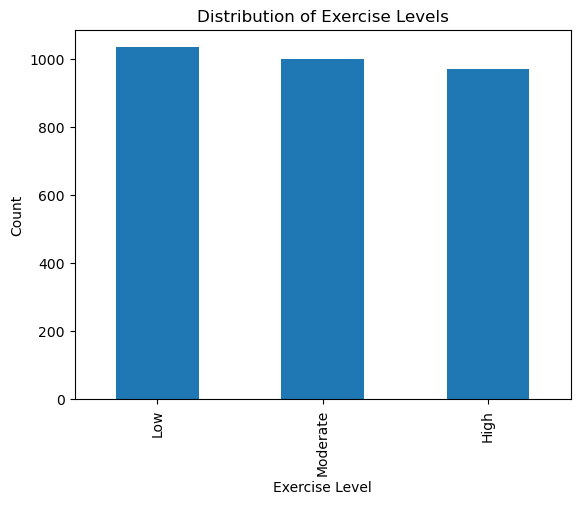

In [153]:
import matplotlib.pyplot as plt
df["Exercise Level"].value_counts().plot(kind="bar")
plt.title("Distribution of Exercise Levels")
plt.ylabel("Count")
plt.show()

In [154]:
#Average sleep hours were calculated for each gender group.
sleep_by_gender = df.groupby("Gender")["Sleep Hours"].mean()
print(sleep_by_gender)

Gender
Female    6.521582
Male      6.445918
Other     6.458534
Name: Sleep Hours, dtype: float64


In [155]:
#percentage of mental health conditions was calculated by country.
condition_by_country = df.groupby("Country")["Mental Health Condition"].value_counts(normalize=True) * 100
print(condition_by_country.head())

Country    Mental Health Condition
Australia  Anxiety                    43.087558
           PTSD                       19.585253
           Depression                 18.894009
           Bipolar                    18.433180
Brazil     Anxiety                    43.373494
Name: proportion, dtype: float64


In [156]:
#Stress level frequencies were measured by weekly work hours.
stress_by_work = df.groupby("Work Hours per Week")["Stress Level"].value_counts()
print(stress_by_work.head())

Work Hours per Week  Stress Level
20                   Moderate        25
                     Low             20
                     High            19
21                   Low             30
                     Moderate        26
Name: count, dtype: int64


In [157]:
#Average happiness score was calculated for each diet type.
happiness_by_diet = df.groupby("Diet Type")["Happiness Score"].mean()
print(happiness_by_diet)

Diet Type
Balanced      5.247680
Junk Food     5.436264
Keto          5.339616
Vegan         5.287086
Vegetarian    5.664527
Name: Happiness Score, dtype: float64


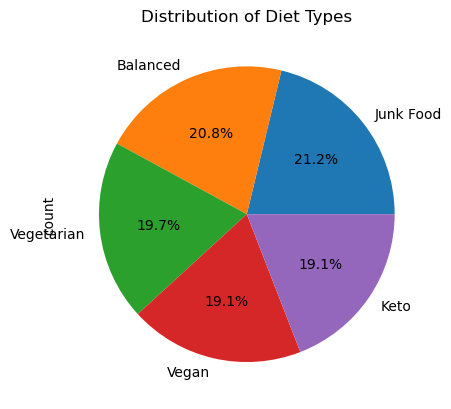

In [158]:
df["Diet Type"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("Distribution of Diet Types")
plt.show()

In [159]:
#number of individuals was counted within each age category.
age_bins = pd.cut(df["Age"], bins=[0, 30, 50, 70, 100])
age_dist = df.groupby(age_bins)["Country"].count()
print(age_dist)

Age
(0, 30]       798
(30, 50]     1301
(50, 70]      901
(70, 100]       0
Name: Country, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_17492\3423358080.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_dist = df.groupby(age_bins)["Country"].count()


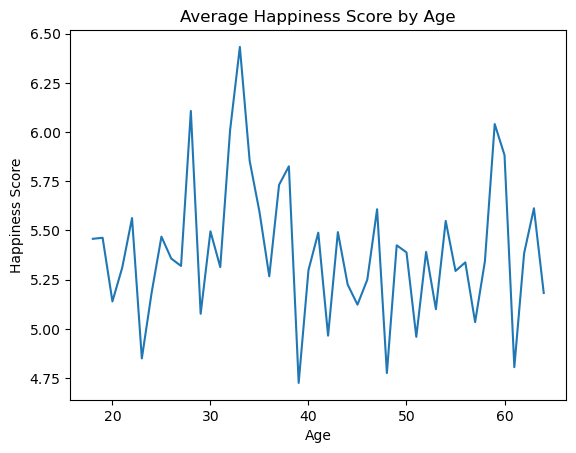

In [160]:
#A line plot was generated to show average happiness by age.
df.groupby("Age")["Happiness Score"].mean().plot(kind="line")
plt.title("Average Happiness Score by Age")
plt.ylabel("Happiness Score")
plt.show()

In [161]:
#Stress level distribution was analyzed across screen time levels.
stress_by_screen = df.groupby("Screen Time per Day (Hours)")["Stress Level"].value_counts()
print(stress_by_screen.head())

Screen Time per Day (Hours)  Stress Level
2.0                          Moderate        12
                             Low              8
                             High             6
2.1                          High            22
                             Moderate        20
Name: count, dtype: int64


In [162]:
#Social interaction scores were summed per country.
social_by_country = df.groupby("Country")["Social Interaction Score"].sum()
print(social_by_country.head())

Country
Australia    2330.2
Brazil       2253.8
Canada       2381.7
Germany      2216.1
India        2358.7
Name: Social Interaction Score, dtype: float64


In [163]:
#top 5 countries were identified based on average sleep hours.
top_sleep_countries = df.groupby("Country")["Sleep Hours"].mean().nlargest(5)
print(top_sleep_countries)

Country
Canada    6.555607
Japan     6.552164
India     6.540783
USA       6.523767
Brazil    6.446024
Name: Sleep Hours, dtype: float64


In [164]:
# Mental health condition counts were broken down by gender.
condition_by_gender = df.groupby("Gender")["Mental Health Condition"].value_counts()
print(condition_by_gender.head())

Gender  Mental Health Condition
Female  Anxiety                    409
        PTSD                       217
        Bipolar                    203
        Depression                 195
Male    Anxiety                    398
Name: count, dtype: int64


In [165]:
#average number of weekly work hours was computed by exercise level.
work_by_exercise = df.groupby("Exercise Level")["Work Hours per Week"].mean()
print(work_by_exercise)

Exercise Level
High        38.947368
Low         39.718296
Moderate    39.709419
Name: Work Hours per Week, dtype: float64


In [166]:
#Average sleep hours were calculated by mental health condition.
stress_dist = df["Stress Level"].value_counts()
print(stress_dist)

Stress Level
Low         1008
High        1002
Moderate     990
Name: count, dtype: int64


In [167]:
# Stress levels were counted to show frequency.
sleep_by_condition = df.groupby("Mental Health Condition")["Sleep Hours"].mean()
print(sleep_by_condition.head())

Mental Health Condition
Anxiety       6.479967
Bipolar       6.488482
Depression    6.441897
PTSD          6.488141
Name: Sleep Hours, dtype: float64


In [168]:
age_happiness = df.groupby(pd.cut(df["Age"], bins=[0, 30, 50, 70, 100]), observed=False)["Happiness Score"].mean()
print(age_happiness)

Age
(0, 30]      5.381830
(30, 50]     5.441660
(50, 70]     5.339512
(70, 100]         NaN
Name: Happiness Score, dtype: float64


In [169]:
screen_by_country = df.groupby("Country")["Screen Time per Day (Hours)"].mean()
print(screen_by_country.head())

Country
Australia    5.019124
Brazil       5.132289
Canada       5.201168
Germany      5.024752
India        4.954608
Name: Screen Time per Day (Hours), dtype: float64


In [170]:
stress_by_social = df.groupby("Social Interaction Score")["Stress Level"].value_counts()
print(stress_by_social.head())

Social Interaction Score  Stress Level
1.0                       High             5
                          Moderate         4
                          Low              3
1.1                       Low             11
                          High             9
Name: count, dtype: int64


In [171]:
happiness_by_diet_total = df.groupby("Diet Type")["Happiness Score"].sum()
print(happiness_by_diet_total)

Diet Type
Balanced      3279.8
Junk Food     3462.9
Keto          3059.6
Vegan         3029.5
Vegetarian    3353.4
Name: Happiness Score, dtype: float64


In [172]:
top_happiness_countries = df.groupby("Country")["Happiness Score"].mean().nlargest(5)
print(top_happiness_countries)

Country
Canada       5.559112
Australia    5.494240
India        5.378802
Germany      5.368069
USA          5.350448
Name: Happiness Score, dtype: float64


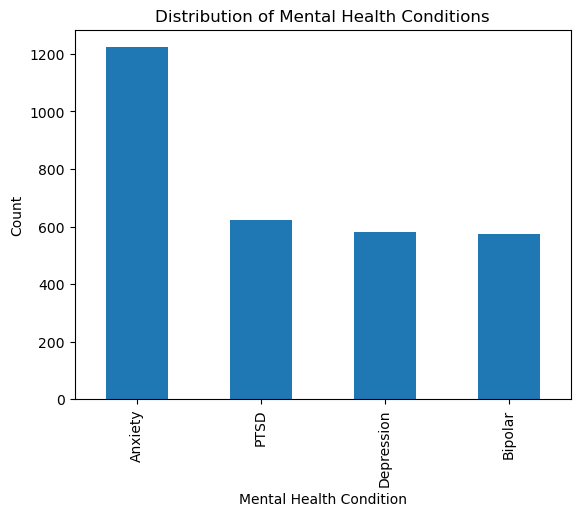

In [174]:
df["Mental Health Condition"].value_counts().plot(kind="bar")
plt.title("Distribution of Mental Health Conditions")
plt.ylabel("Count")
plt.show()

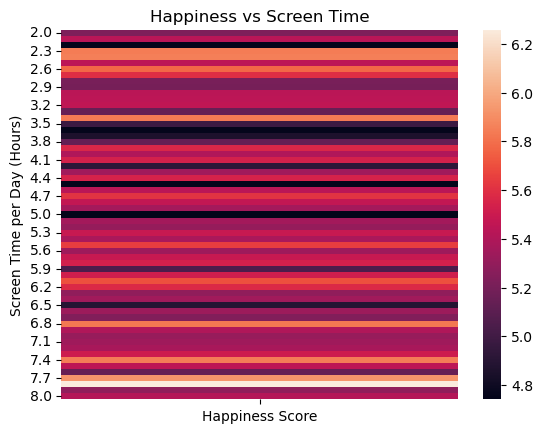

In [211]:
pivot = df.pivot_table(values="Happiness Score", index="Screen Time per Day (Hours)", aggfunc="mean")
sns.heatmap(pivot)
plt.title("Happiness vs Screen Time")
plt.show()